In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
people_adj_matrices = np.load("all_participants_3d_adj_matrix.npy")
people_adj_matrices.shape

(70, 116, 116)

In [3]:
#-- remove person 15 (index 14)
people_adj_matrices = np.delete(people_adj_matrices, 14, axis=0)

people_adj_matrices_binary = np.where(people_adj_matrices!=0,1,0)
people_adj_matrices_absolute = np.abs(people_adj_matrices)

In [28]:
people_adj_matrices

array([[[ 0.        ,  0.        , -0.        , ...,  0.        ,
          0.27848914,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.        ,  0.        ,  0.        , ..., -0.        ,
         -0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        , -0.        , ...,  0.        ,
          0.57859663,  0.11846504],
        [ 0.27848914,  0.        , -0.        , ...,  0.57859663,
          0.        ,  0.47844606],
        [ 0.        ,  0.        ,  0.        , ...,  0.11846504,
          0.47844606,  0.        ]],

       [[ 0.        ,  0.06345045, -0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.06345045,  0.        , -0.2463201 , ...,  0.        ,
          0.        , -0.        ],
        [-0.        , -0.2463201 ,  0.        , ..., -0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        , -0.        , ...,  

In [4]:
people_adj_matrices_absolute.shape

(69, 116, 116)

In [5]:
number_of_people = people_adj_matrices.shape[0]

In [6]:
#-- 1 to 49 : Depressed people
#-- 50 to 69 : Healthy people

In [7]:
len(people_adj_matrices)

69

In [375]:
#-- WEIGHTED
brain_networks = [] #-- contains all the 69 graph objects
average_degrees = np.empty(number_of_people)
diameter = np.empty(number_of_people)
average_path_length = np.empty(number_of_people)
average_clustering_coefficients = np.empty(number_of_people)
degree_assortativity_coefficient = np.empty(number_of_people)
network_density = np.empty(number_of_people)
degrees = []
for i in range(number_of_people):
  G = nx.from_numpy_array(people_adj_matrices[i])
  brain_networks.append(G)
  degrees.append([v for _,v in G.degree(weight='weight')])
  average_degrees[i] = np.mean(degrees[i])
  diameter[i] = nx.diameter(G)
  average_path_length[i] = nx.average_shortest_path_length(G)
  average_clustering_coefficients[i] = nx.average_clustering(G, weight='weight')
  degree_assortativity_coefficient[i] = nx.degree_assortativity_coefficient(G, weight='weight')
  network_density[i] = nx.density(G)


people_index = np.arange(0,number_of_people)

groups = np.concatenate((np.ones(49),np.zeros(20)))

brain_df = pd.DataFrame(people_index, columns=['Index'])
brain_df['Group'] = groups
brain_df['Average Strength'] = average_degrees
brain_df['Average Shortest Path Length'] = average_path_length
brain_df['Average Clustering Coefficient'] = average_clustering_coefficients
brain_df['Network Diameter'] = diameter
brain_df['Degree Assortativity Coefficient'] = degree_assortativity_coefficient
brain_df['Network Density'] = network_density

In [367]:
#-- Binary
brain_networks_binary = [] #-- contains all the 69 graph objects
average_degrees_binary = np.empty(number_of_people)
diameter_binary = np.empty(number_of_people)
average_path_length_binary = np.empty(number_of_people)
average_clustering_coefficients_binary = np.empty(number_of_people)
degree_assortativity_coefficient_binary = np.empty(number_of_people)
network_density_binary = np.empty(number_of_people)
degrees_binary = []
for i in range(number_of_people):
  G = nx.from_numpy_array(people_adj_matrices_binary[i])
  brain_networks_binary.append(G)
  degrees_binary.append([v for _,v in G.degree(weight='weight')])
  average_degrees_binary[i] = np.mean(degrees_binary[i])
  diameter_binary[i] = nx.diameter(G,weight='weight')
  average_path_length_binary[i] = nx.average_shortest_path_length(G, weight='weight')
  average_clustering_coefficients_binary[i] = nx.average_clustering(G)
  degree_assortativity_coefficient_binary[i] = nx.degree_assortativity_coefficient(G)
  network_density_binary[i] = nx.density(G)


people_index = np.arange(0,number_of_people)

groups = np.concatenate((np.ones(49),np.zeros(20)))

brain_df_binary = pd.DataFrame(people_index, columns=['Index'])
brain_df_binary['Group'] = groups
brain_df_binary['Average Degree'] = average_degrees_binary
brain_df_binary['Average Shortest Path Length'] = average_path_length_binary
brain_df_binary['Average Clustering Coefficient'] = average_clustering_coefficients_binary
brain_df_binary['Network Diameter'] = diameter_binary
brain_df_binary['Degree Assortativity Coefficient'] = degree_assortativity_coefficient_binary
brain_df_binary['Network Density'] = network_density_binary

In [371]:
#-- Absolute
brain_networks_absolute = [] #-- contains all the 69 graph objects
average_degrees_absolute = np.empty(number_of_people)
diameter_absolute = np.empty(number_of_people)
average_path_length_absolute = np.empty(number_of_people)
average_clustering_coefficients_absolute = np.empty(number_of_people)
degree_assortativity_coefficient_absolute = np.empty(number_of_people)
network_density_absolute = np.empty(number_of_people)
degrees_absolute = []
for i in range(number_of_people):
  G = nx.from_numpy_array(people_adj_matrices_absolute[i])
  brain_networks_absolute.append(G)
  degrees_absolute.append([v for _,v in G.degree(weight='weight')])
  average_degrees_absolute[i] = np.mean(degrees_absolute[i])
  diameter_absolute[i] = nx.diameter(G,weight='weight')
  average_path_length_absolute[i] = nx.average_shortest_path_length(G, weight='weight')
  average_clustering_coefficients_absolute[i] = nx.average_clustering(G,weight='weight')
  degree_assortativity_coefficient_absolute[i] = nx.degree_assortativity_coefficient(G,weight='weight')
  network_density_absolute[i] = nx.density(G)


people_index = np.arange(0,number_of_people)

groups = np.concatenate((np.ones(49),np.zeros(20)))

brain_df_absolute = pd.DataFrame(people_index, columns=['Index'])
brain_df_absolute['Group'] = groups
brain_df_absolute['Average Strength'] = average_degrees_absolute
brain_df_absolute['Average Shortest Path Length'] = average_path_length_absolute
brain_df_absolute['Average Clustering Coefficient'] = average_clustering_coefficients_absolute
brain_df_absolute['Network Diameter'] = diameter_absolute
brain_df_absolute['Degree Assortativity Coefficient'] = degree_assortativity_coefficient_absolute
brain_df_absolute['Network Density'] = network_density_absolute

In [380]:
brain_df

,Index,Group,Average Strength,Average Shortest Path Length,Average Clustering Coefficient,Network Diameter,Degree Assortativity Coefficient,Network Density
0,0,1.0,1.401052,1.892054,0.019431,3.0,0.055974,0.158771
1,1,1.0,1.217955,1.965667,0.020128,3.0,0.101993,0.141379
2,2,1.0,1.594365,1.961169,0.017415,3.0,0.147761,0.143178
3,3,1.0,1.606816,1.935232,0.016871,3.0,0.028268,0.149325
4,4,1.0,1.558359,1.907946,0.017254,3.0,0.180687,0.152924
...,...,...,...,...,...,...,...,...
64,64,0.0,1.494433,1.920540,0.017474,3.0,0.075255,0.151274
65,65,0.0,1.644377,1.931784,0.016532,3.0,0.114694,0.149025
66,66,0.0,1.050037,1.921139,0.020185,3.0,0.133505,0.152174
67,67,0.0,1.428245,1.914843,0.017691,3.0,0.079702,0.153373


In [381]:
brain_df_absolute

,Index,Group,Average Strength,Average Shortest Path Length,Average Clustering Coefficient,Network Diameter,Degree Assortativity Coefficient,Network Density
0,0,1.0,2.398992,0.041359,0.019913,0.126606,0.078601,0.158771
1,1,1.0,2.235479,0.043598,0.020365,0.129758,0.131216,0.141379
2,2,1.0,2.287396,0.046805,0.017629,0.129559,0.121053,0.143178
3,3,1.0,2.384295,0.035985,0.017149,0.134113,0.025820,0.149325
4,4,1.0,2.417550,0.044961,0.017567,0.130229,0.155714,0.152924
...,...,...,...,...,...,...,...,...
64,64,0.0,2.359466,0.038381,0.017978,0.129508,0.095082,0.151274
65,65,0.0,2.468489,0.039630,0.016888,0.115225,0.076880,0.149025
66,66,0.0,2.362410,0.039406,0.020615,0.112517,0.133420,0.152174
67,67,0.0,2.431623,0.039295,0.018119,0.107292,0.126332,0.153373


In [382]:
brain_df_binary

,Index,Group,Average Degree,Average Shortest Path Length,Average Clustering Coefficient,Network Diameter,Degree Assortativity Coefficient,Network Density
0,0,1.0,18.258621,1.892054,0.221661,3.0,-0.059257,0.158771
1,1,1.0,16.258621,1.965667,0.226179,3.0,0.001588,0.141379
2,2,1.0,16.465517,1.961169,0.221064,3.0,-0.004071,0.143178
3,3,1.0,17.172414,1.935232,0.225179,3.0,-0.008530,0.149325
4,4,1.0,17.586207,1.907946,0.214765,3.0,0.059825,0.152924
...,...,...,...,...,...,...,...,...
64,64,0.0,17.396552,1.920540,0.201395,3.0,0.111052,0.151274
65,65,0.0,17.137931,1.931784,0.217319,3.0,0.041764,0.149025
66,66,0.0,17.500000,1.921139,0.218931,3.0,-0.033724,0.152174
67,67,0.0,17.637931,1.914843,0.212091,3.0,-0.045644,0.153373


In [8]:
#-- FINAL
brain_networks = [] #-- contains all the 69 graph objects
average_degrees = np.empty(number_of_people)
average_strength = np.empty(number_of_people)
diameter = np.empty(number_of_people)
average_path_length = np.empty(number_of_people)
average_clustering_coefficients = np.empty(number_of_people)
degree_assortativity_coefficient = np.empty(number_of_people)
network_density = np.empty(number_of_people)
degrees = []
strength = []
for i in range(number_of_people):
  G = nx.from_numpy_array(people_adj_matrices[i])
  G_binary = nx.from_numpy_array(people_adj_matrices_binary[i])
  G_absolute = nx.from_numpy_array(people_adj_matrices_absolute[i])
  brain_networks.append(G)
  degrees.append([v for _,v in G_binary.degree(weight='weight')])
  strength.append([v for _,v in G_absolute.degree(weight='weight')])
  average_degrees[i] = np.mean(degrees[i])
  average_strength[i] = np.mean(strength[i])
  diameter[i] = nx.diameter(G_binary)
  average_path_length[i] = nx.average_shortest_path_length(G_binary,weight='weight')
  average_clustering_coefficients[i] = nx.average_clustering(G_binary, weight='weight')
  degree_assortativity_coefficient[i] = nx.degree_assortativity_coefficient(G_binary, weight='weight')
  network_density[i] = nx.density(G_binary)


people_index = np.arange(0,number_of_people)

groups = np.concatenate((np.zeros(49),np.ones(20)))

brain_df = pd.DataFrame(people_index, columns=['Index'])
brain_df['Group'] = groups
brain_df['Average Degree'] = average_degrees
brain_df['Average Strength'] = average_strength
brain_df['Average Shortest Path Length'] = average_path_length
brain_df['Average Clustering Coefficient'] = average_clustering_coefficients
brain_df['Network Diameter'] = diameter
brain_df['Degree Assortativity Coefficient'] = degree_assortativity_coefficient
brain_df['Network Density'] = network_density

In [9]:
brain_df

,Index,Group,Average Degree,Average Strength,Average Shortest Path Length,Average Clustering Coefficient,Network Diameter,Degree Assortativity Coefficient,Network Density
0,0,0.0,18.258621,2.398992,1.892054,0.221661,3.0,-0.059257,0.158771
1,1,0.0,16.258621,2.235479,1.965667,0.226179,3.0,0.001588,0.141379
2,2,0.0,16.465517,2.287396,1.961169,0.221064,3.0,-0.004071,0.143178
3,3,0.0,17.172414,2.384295,1.935232,0.225179,3.0,-0.008530,0.149325
4,4,0.0,17.586207,2.417550,1.907946,0.214765,3.0,0.059825,0.152924
...,...,...,...,...,...,...,...,...,...
64,64,1.0,17.396552,2.359466,1.920540,0.201395,3.0,0.111052,0.151274
65,65,1.0,17.137931,2.468489,1.931784,0.217319,3.0,0.041764,0.149025
66,66,1.0,17.500000,2.362410,1.921139,0.218931,3.0,-0.033724,0.152174
67,67,1.0,17.637931,2.431623,1.914843,0.212091,3.0,-0.045644,0.153373


NormaltestResult(statistic=1.6202969107087308, pvalue=0.44479202956294694)
NormaltestResult(statistic=2.59296247795154, pvalue=0.2734924564665074)
TtestResult(statistic=-0.17548883171439555, pvalue=0.8612248392389823, df=67.0)


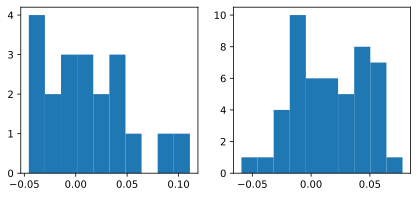

In [10]:
import scipy as sp
metric = 'Degree Assortativity Coefficient'
print(sp.stats.normaltest(brain_df[brain_df['Group']==1.0][metric]))
print(sp.stats.normaltest(brain_df[brain_df['Group']==0.0][metric]))
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.hist(brain_df[brain_df['Group']==1.0][metric])
plt.subplot(1,2,2)
plt.hist(brain_df[brain_df['Group']==0.0][metric])

print(sp.stats.ttest_ind(brain_df[brain_df['Group']==1.0][metric], brain_df[brain_df['Group']==0.0][metric]))

NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=490.0, pvalue=1.0)


/Users/g2k/Code/.venv/es404/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1584: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/g2k/Code/.venv/es404/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1786: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


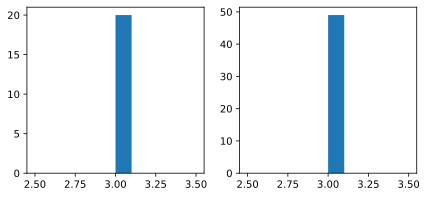

In [11]:
import scipy as sp
metric = 'Network Diameter'
print(sp.stats.normaltest(brain_df[brain_df['Group']==1.0][metric]))
print(sp.stats.normaltest(brain_df[brain_df['Group']==0.0][metric]))
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.hist(brain_df[brain_df['Group']==1.0][metric])
plt.subplot(1,2,2)
plt.hist(brain_df[brain_df['Group']==0.0][metric])

print(sp.stats.mannwhitneyu(brain_df[brain_df['Group']==1.0][metric], brain_df[brain_df['Group']==0.0][metric]))

In [12]:
brain_df[brain_df['Group']==0.0]['Average Degree'].mean()

16.746305418719214

In [13]:
brain_df['Average Degree']

0     18.258621
1     16.258621
2     16.465517
3     17.172414
4     17.586207
        ...    
64    17.396552
65    17.137931
66    17.500000
67    17.637931
68    16.362069
Name: Average Degree, Length: 69, dtype: float64

In [ ]:
sp.stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=sp.stats.sem(a))

In [22]:

metric = 'Average Degree'

def plot_comparison(brain_df, metric):
  x1 = brain_df[brain_df['Group']==1.0][metric].mean() #-- healthy
  x0 = brain_df[brain_df['Group']==0.0][metric].mean() #-- depressed

  e1 = brain_df[brain_df['Group']==1.0][metric].std()
  e0 = brain_df[brain_df['Group']==0.0][metric].std()
  # e1 = sp.stats.t.interval(0.95, len(brain_df[brain_df['Group']==1.0][metric])-1, loc=np.mean(brain_df[brain_df['Group']==1.0][metric]), scale=brain_df[brain_df['Group']==1.0][metric].sem())
  # e0 = sp.stats.t.interval(0.95, len(brain_df[brain_df['Group']==0.0][metric])-1, loc=np.mean(brain_df[brain_df['Group']==0.0][metric]), scale=brain_df[brain_df['Group']==0.0][metric].sem())

  plt.figure()
  plt.plot(brain_df['Group'], brain_df[metric],'.', alpha=0.5)
  plt.errorbar([0.0,1.0], [x0,x1], yerr=[e0,e1], fmt='o-', color='red', capsize=5)
  plt.title(metric)
  plt.xticks([0.0,1.0],['Depressed', 'Healthy'])
  plt.xlim(-0.5,1.5)
  # plt.ylim(15.0,18.0)

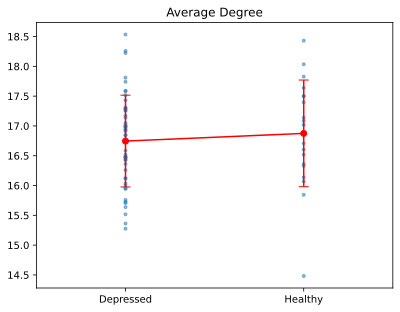

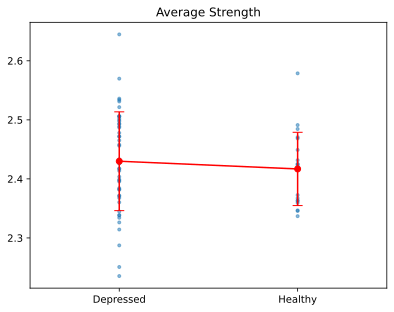

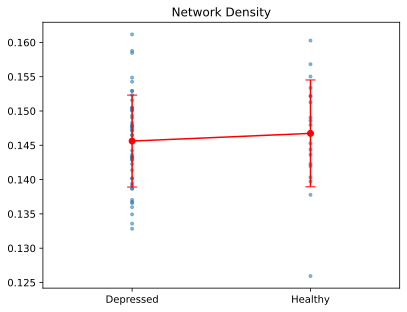

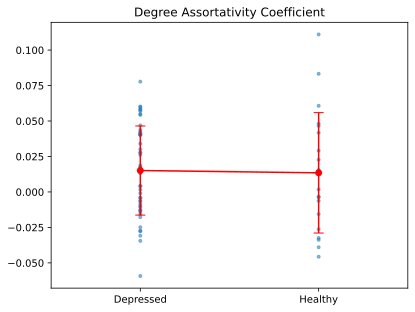

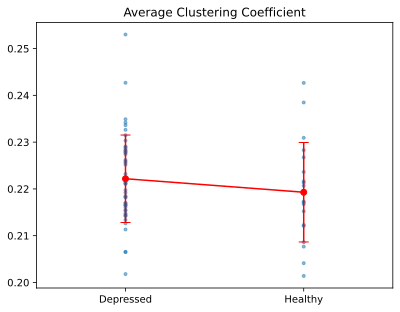

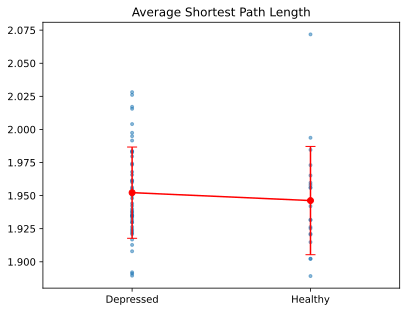

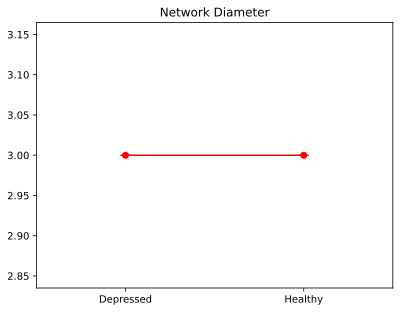

In [26]:
metrics = ['Average Degree', 'Average Strength', 'Network Density', 'Degree Assortativity Coefficient', 'Average Clustering Coefficient', 'Average Shortest Path Length', 'Network Diameter']
for metric in metrics:
  plot_comparison(brain_df, metric)

# Degree Distributions

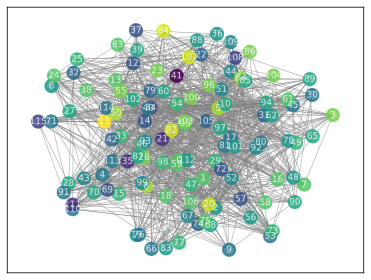

In [266]:
options = {
      "node_size": 150,
      "node_color": [v for _,v in G.degree()],
      "font_color": 'white',
      "font_size": 9,
      "edge_color": "gray",
      "cmap": "viridis",
      # "with_labels": False,
      # "vmin":vmin,
      # "vmax":vmax,
      "alpha":0.8,
      "width":0.5
  }
pos=nx.spring_layout(G, k = 0.5)

nx.draw_networkx(brain_networks[2], pos, **options, linewidths=2)

In [383]:
def degreeDistribution(G):

  degree_sequence = [d for n,d in G.degree()]
  
  plt.figure(figsize=(10, 4))

  # Linear binning
  plt.subplot(1, 2, 1)
  # plt.hist(degree_sequence, bins=20, edgecolor='black')
  plt.hist(degree_sequence, bins=range(np.min(degree_sequence),np.max(degree_sequence)+1), edgecolor='black')
  plt.title('Degree Distribution')
  plt.xlabel('Degree')
  plt.ylabel('Frequency')
  plt.xticks(range(np.min(degree_sequence),np.max(degree_sequence)+1), rotation=70)
  plt.grid(True, which="both", ls="--", linewidth=0.5)

  # # Log scale Linear binning
  # plt.subplot(1, 3, 2)
  # plt.title('Log-Log Scale (Linear Binning)')
  # bin_edges = np.arange(start=np.floor(np.min(degree_sequence)),
  #                     stop=np.ceil(np.max(degree_sequence)) + 10,
  #                     step=10)

  # bin_indices = np.digitize(degree_sequence, bins=bin_edges)

  # bin_counts = np.bincount(bin_indices)[1:]

  # mid_points = bin_edges[:-1] + 5  # Midpoint of each bin assuming bin size of 10

  # plt.scatter(mid_points, bin_counts, color='blue', alpha=0.6)

  # plt.xscale('log')
  # plt.yscale('log')

  # plt.xlabel('Midpoint of Bin')
  # plt.ylabel('Frequency')
  # plt.grid(True, which="both", ls="--", linewidth=0.5)

  # Log scale log binning
  plt.subplot(1, 2, 2)

  plt.title('Log-Log Scale (Logarithmic Binning)')
  max_log = np.log10(np.max(degree_sequence))
  bin_edges = np.logspace(start=0, stop=max_log, num=20, base=10)

  hist, edges = np.histogram(degree_sequence, bins=bin_edges)

  mid_points = np.sqrt(edges[:-1] * edges[1:])

  plt.scatter(mid_points, hist, color='blue', alpha=0.6)

  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('Midpoint of Bin (Log Scale)')
  plt.ylabel('Frequency')
  plt.grid(True, which="both", ls="--", linewidth=0.5)
  
  plt.show()

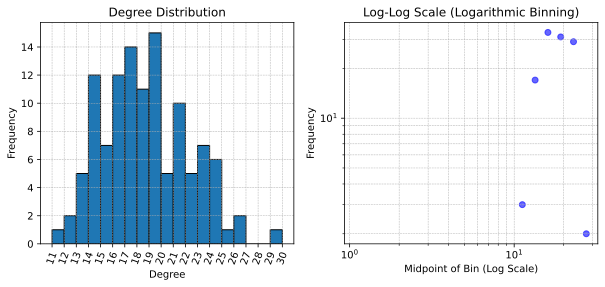

In [384]:
degreeDistribution(brain_networks[0])

# Correlation Matrix

In [33]:
?np.corrcoef

Signature:      
np.corrcoef(
    x,
    y=None,
    rowvar=True,
    bias=<no value>,
    ddof=<no value>,
    *,
    dtype=None,
)
Call signature:  np.corrcoef(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function corrcoef at 0x1064e5760>
File:            ~/Code/.venv/es404/lib/python3.11/site-packages/numpy/lib/function_base.py
Docstring:      
Return Pearson product-moment correlation coefficients.

Please refer to the documentation for `cov` for more detail.  The
relationship between the correlation coefficient matrix, `R`, and the
covariance matrix, `C`, is

.. math:: R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} C_{jj} } }

The values of `R` are between -1 and 1, inclusive.

Parameters
----------
x : array_like
    A 1-D or 2-D array containing multiple variables and observations.
    Each row of `x` represents a variable, and each column a single
    observation of all those variables. Also see `rowvar` below.
y : array_like, optional
    An additiona

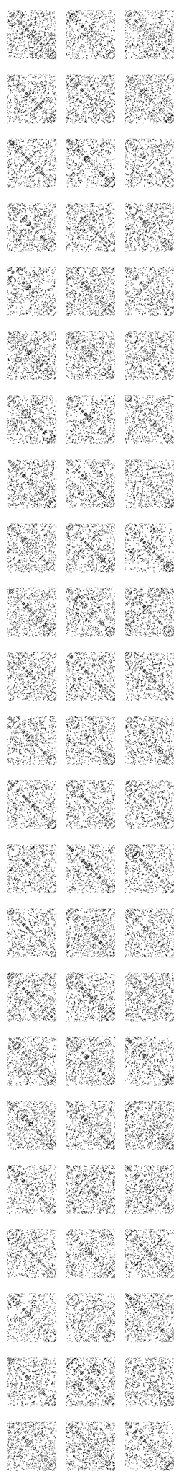

In [90]:


# Plot heatmap
plt.figure(figsize=(3, 80))

for i in range(69):
  plt.subplot(69,3,i+1)
  correlation_matrix = people_adj_matrices_binary[i]
  plt.imshow(correlation_matrix, cmap='gray_r', interpolation='nearest')
  plt.axis('off')
# plt.colorbar(label='Correlation')
# plt.title('Correlation Matrix Heatmap')
plt.show()